## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Импорт данных и изучение информации

### Импортируем данные

In [1]:
# Импорт необходимых нам для работы библиотек
import pandas as pd # Импортируем pandas
import matplotlib.pyplot as plt # Импортируем matplotlib
import seaborn as sns # Импортируем seaborn
from scipy import stats as st # Импортируем scipy

In [2]:
data = pd.read_csv('/datasets/games.csv') # # Сохраняем информацию файла в датафрейме data

data.head() # Выводим шапку датафрейма, дабы ознакомиться с данными

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изучаем общую информацию о данных

In [3]:
data.info() # Выводим информацию о датафрейме, чтобы изучить типы данных и пропуски значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Name - пропуски значений
* Year_of_Release - пропуски значений, имеет тип 'float', а должен быть 'int', т.к. год не может быть дробным
* Genre - пропуски значений
* Critic_Score - пропуски значений
* User_Score - пропуски значений, имеет тип 'object' вместо 'float'
* Rating - пропуски значений

Названия столбцов необходимо привести к нижнему регистру.

### Строим гистограммы

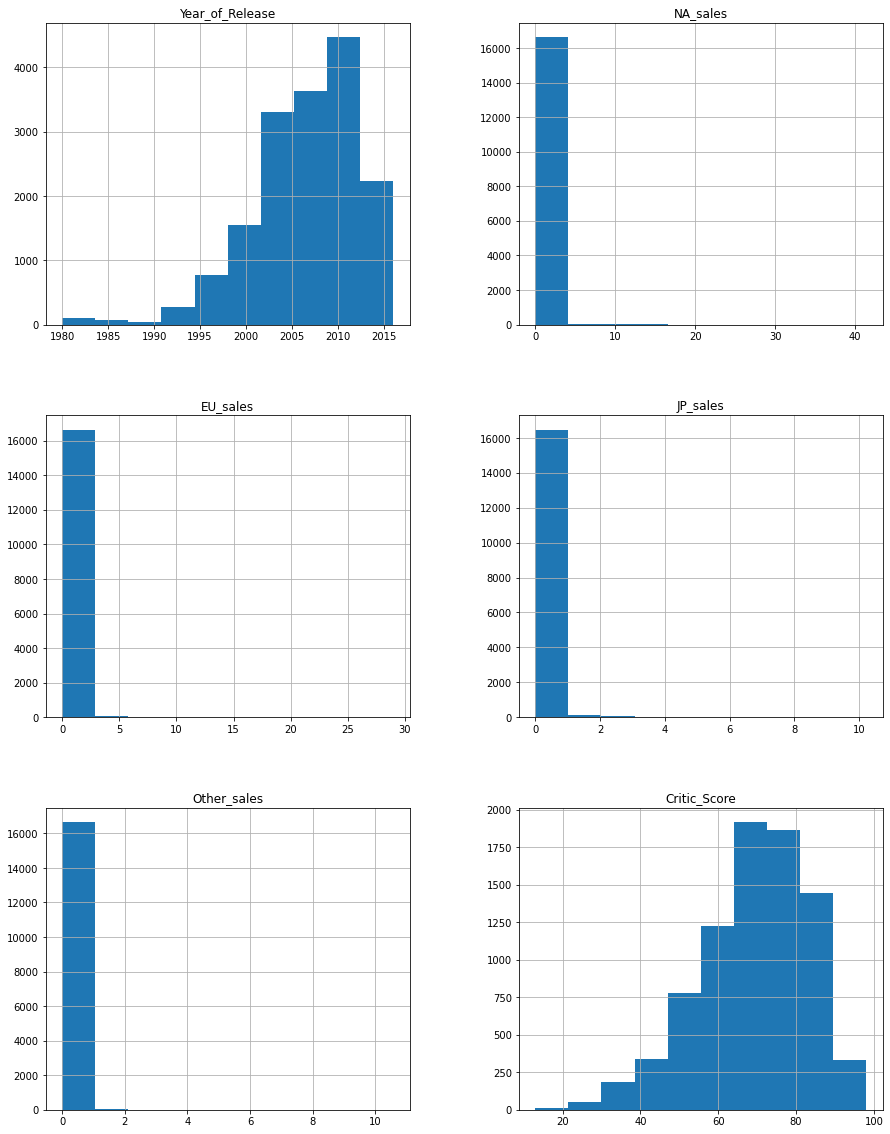

In [4]:
data.hist(figsize=(15, 20)) # Строим общую гистограмму для всех столбцов таблицы
None

По графикам видно:
* Год релиза - с `~1995` года идет стремительное увеличение изданных игр вплоть до `2011-2012` года, после которого следует обвал почти на половину.
* Продажи - каждый из трех графиков примерно одинаков по оси Y, что показывает, что количество продаж от региона к региону практически не меняется, но различия можно заметить в сумме этих продаж.
* Оценки критиков - в основном сосредоточены на `70-80` и никогда не доходят до отметки в `100`. Вполовину реже критики ставят 50.

## Подготовка данных

### Изменение регистра столбцов

In [5]:
data.columns = map(str.lower, data.columns) # Приводим названия столбцов к нижнему регистру

### Устранение пропусков

Наибольшее количество пропусков мы видим в столбцах с оценками пользователей, критиков и рейтинга организации ESRB.
Пропуски в данных столбцах могли быть вызваны несколькими причинами:
* Система сбора информации дала сбой
* Сокрытие информации
* Фрод

In [6]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалять строки в `critic_score`, `user_score`, `rating` мы не станем, чтобы не лишиться строк с остальными важными данными.

In [8]:
data['year_of_release'].sort_values().unique() # Смотрим уникальные значения года релиза

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Как мы видим - в нашем распоряжении данные об играх, изданных в период с 1980 по 2016 год.
Ассоциация ESRB (Entertainment Software Rating Board) была основана в 1994 году.
Проверим, вызваны ли пропуски в столбе "rating" фактом, что до 1994 года ее не существовало

In [9]:
data[data['year_of_release'] <= 1994].isna().sum() # фильтруем датафрейм с данными об играх до 1994
# и смотрим на количество пропущенных значений

name                 2
platform             0
year_of_release      0
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       484
user_score         484
rating             483
dtype: int64

In [10]:
data[data['year_of_release'] <= 1994].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN


In [11]:
data[data['year_of_release'] <= 1994]['name'].count()

486

Практически все игры в то время издавались без оценок, но в общей совокупности количество пропусков за эти года составляет менее 10% от всех пропущенных значений. Значит, проблема не в отсутствии ESRB.

In [12]:
data['rating']

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: rating, Length: 16715, dtype: object

In [13]:
data['rating'] = data['rating'].fillna('undefined')
data = data.fillna(0)

Заменим все пропущенные значения на ноль, т.к. невозможно выявить их причину, а заполнять пропуски в оценках средним или медианой было бы нечестно и исказило бы данные. К тому же, можно исключить нулевые оценки в дальнейших исследованиях.

In [14]:
data['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Также в столбце с оценкой пользователей мы можем встретить аббревиатуру 'tdb' от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.
Так как заменить ее каким-либо определенным значением мы не можем - поменяем ее на 0, дабы иметь возможность дальше корректно работать с данными в этом столбце

In [15]:
data['user_score'] = data['user_score'].replace('tbd', 0.00)

### Изменяем типы данных

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int) # делаем значения годов релиза целым числом
data['user_score'] = data['user_score'].astype(float) # а оценки пользователей типом float

In [17]:
# Еще раз взглянем на информацию о наших уже предобработанных данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Пропущенных значений не осталось и каждый столбец имеет нужный тип данных.

### Суммарные продажи во всех регионах

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,undefined,31.38


## Исследовательский анализ данных

### Cколько игр выпускалось в разные годы

In [19]:
data.groupby('year_of_release')['name'].count() # посмотрим, сколько игр выпускалось в разные годы

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

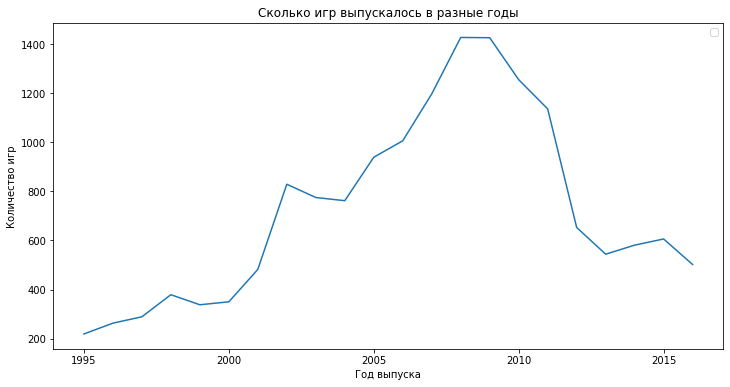

In [20]:
release_data = data.loc[data['year_of_release'] > 1994].pivot_table(index='year_of_release',
                                                                    values='name',
                                                                    aggfunc='count')
plt.figure(figsize=(12,6))

sns.lineplot(data=release_data)

plt.title('Сколько игр выпускалось в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.legend('')
None

Всего у нас было выпущенно `16715`. Наибольшее кол-во игр было выпущено в 2008-2009 гг.

До с 1980 по 1993 количество игр, выпускаемых в год, росло постепенно.
Начиная с 1994 произошел резкий скачок вплоть до 2011.
А вот с 2012 почему-то идет спад почти в два раза.

Немного покапавшись в интернете, выяснил, что связано это может быть с тем, что многие компании игровой индустрии перестали получать должное финансирование на разработку из-за кризиса того времени. К тому же упала платежеспособность людей, которые лишились возможности тратить деньги на развлечения и покупать новые консоли. Спад продаж нового поколения консолей привёл к сокращению потенциального рынка сбыта.

Сложно утверждать, именно это ли повлияло на обвал, но похоже на правду.

Также, так как до 1994 года количество игр, выпускаемых за год, было не особо велико, а оценки пользователей и критиков полностью пропущены - считаю, что этот период в нашем исследовании не так важен и его можно убрать.

In [21]:
data = data.loc[data['year_of_release'] > 1994]

### Как менялись продажи по платформам

In [22]:
# Посмотрим, как менялись продажи по платформам по данным из сводной таблицы
top_total_sales = data.pivot_table(index='platform',
                 values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                 aggfunc='sum').sort_values(by = 'total_sales', ascending=False)

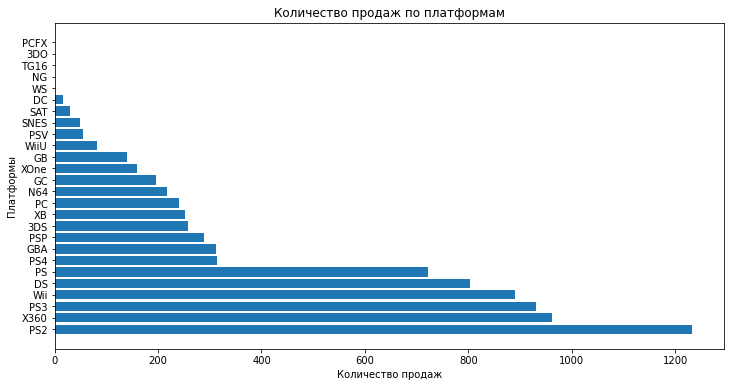

In [23]:
# Построим график для наглядности
index = top_total_sales.sort_values('total_sales', ascending=False).index
values = top_total_sales.sort_values('total_sales', ascending=False)['total_sales']

plt.figure(figsize=(12,6))

plt.title('Количество продаж по платформам')
plt.xlabel('Количество продаж')
plt.ylabel('Платформы')

plt.barh(index, values)
None

Из него видно, что больше всего продаж было на PS2, X360, PS3, Wii и DS.

In [24]:
# Выберем платформы с наибольшими суммарными продажами
top5_total_sales = data.pivot_table(index='platform',
                 values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
                 aggfunc='sum').sort_values(by = 'total_sales', ascending=False).head(5)
top5_total_sales

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PS2,332.63,137.54,572.92,190.47,1233.56
X360,268.32,12.30,595.74,84.88,961.24
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.00,380.31,59.04,802.76


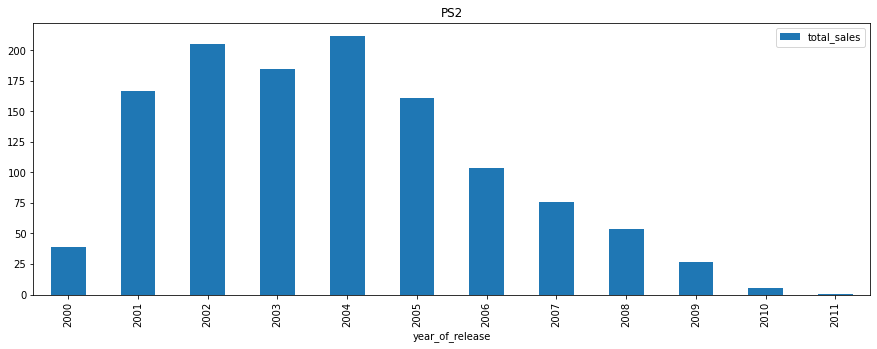

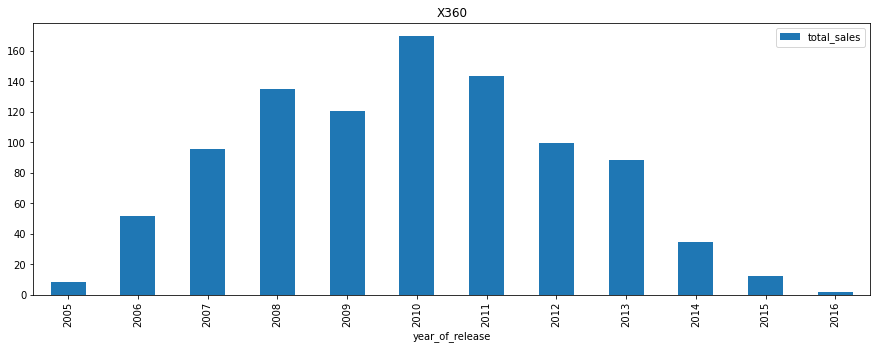

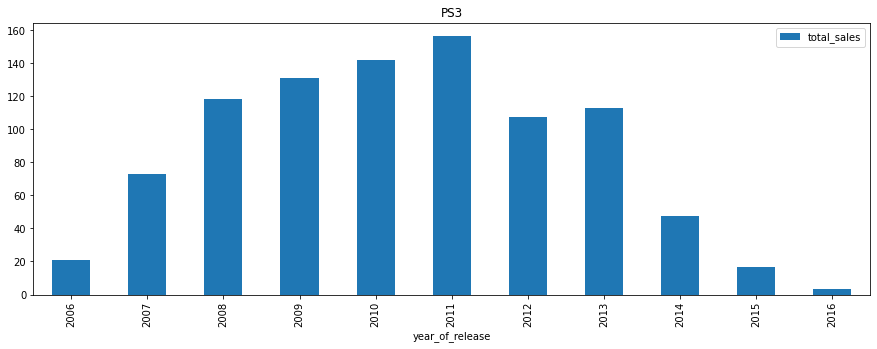

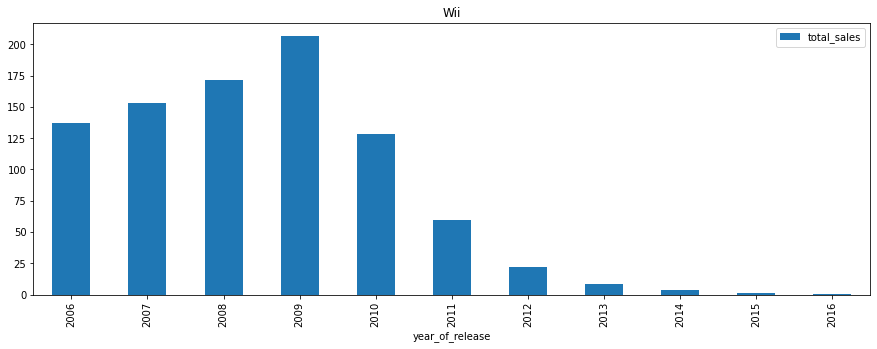

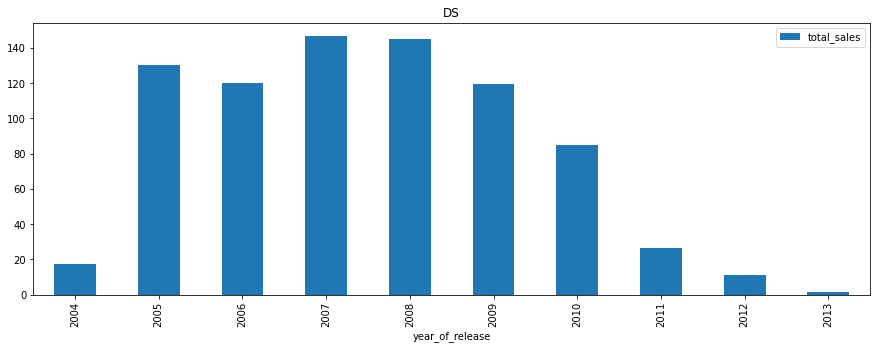

In [25]:
# Посмотрим распределение продаж по годам для наиболее прибыльных платформ
for platform in top5_total_sales.index:
    data[data['platform'] == platform].pivot_table(index='year_of_release',
                                                   values='total_sales',
                                                   aggfunc='sum').plot(kind='bar', figsize=(15,5))
    plt.title(platform)

Из графиков видно, что среднее время жизни платформы - 10 лет.

### Актуальный период

Основываясь на предудщих выводах - возьмем за актуальный период с 2012 по 2016 гг., т.к. данные до этого периода могут исказить прогноз на 2017 год.

In [26]:
actual_data = data.query('year_of_release >= 2012')

### Потенциально прибыльные платформы

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

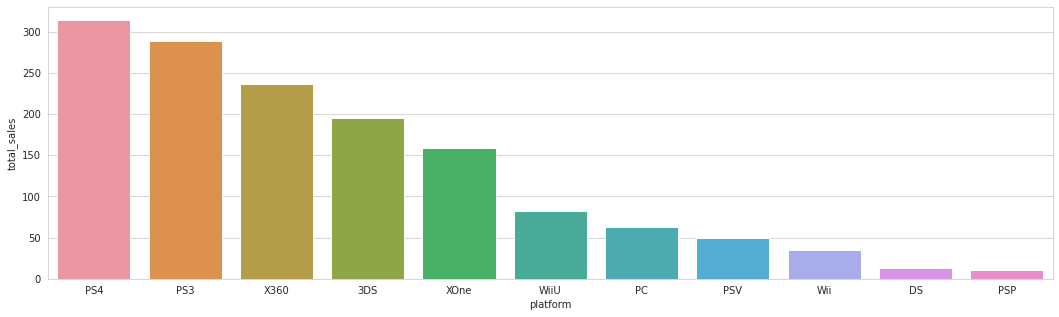

In [27]:
actual_pivot = actual_data.pivot_table(index='platform',
                                          values='total_sales',
                                          aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
 
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_pivot, x='platform', y='total_sales')

Наиболее прибыльными себя показывают PS4, PS3, X360, 3DS, XOne

In [28]:
actual_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Смотря на данную сводную таблицу необходимо помнить, что данные за 2016 год являются неполными.

Можно отметить неплохой рост продаж PS4 и XOne, а вот продажи PC, PS3, PSV, Wii, X360 заметно идут вниз.
Продажи DS сошли на нет практически также, как и PSP.

Продажи PS3 и X360 начали падать по понятным причинам - вышло новое поколение консолей.

В лидеры продаж можно отметить 3DS, PS4, XOne

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

#### PS4

(0.0, 3.0)

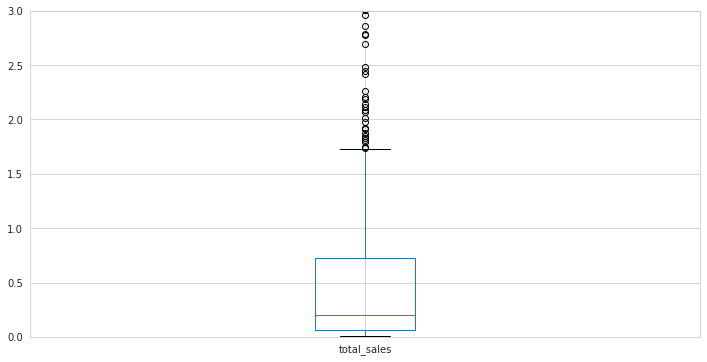

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

ps4 = actual_data.query('platform == "PS4"')
ps4.boxplot(column='total_sales')

ax.set_ylim([0, 3])

In [30]:
actual_data_pivot = actual_data[actual_data['platform'] == 'PS4'].pivot_table(index='year_of_release',
                                                                              values = 'total_sales',
                                                                              aggfunc = 'sum')
actual_data_pivot

,total_sales
year_of_release,
2013,25.99
2014,100.00
2015,118.90
2016,69.25


PS4 в 2013 году только начинает набирать популярность после своего релиза и имеет на старте продаж почти 26 млн.
И продажи продолжают стремительно расти.

#### 3DS

In [31]:
actual_data_pivot = actual_data[actual_data['platform'] == '3DS'].pivot_table(index='year_of_release',
                                                                              values = 'total_sales',
                                                                              aggfunc = 'sum')
actual_data_pivot

,total_sales
year_of_release,
2012,51.36
2013,56.57
2014,43.76
2015,27.78
2016,15.14


(0.0, 2.0)

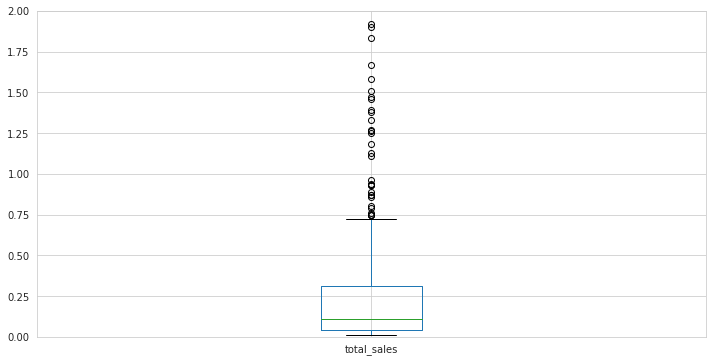

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

n_3ds = actual_data.query('platform == "3DS"')
n_3ds.boxplot(column='total_sales')

ax.set_ylim([0, 2])

In [33]:
actual_data_pivot = actual_data[actual_data['platform'] == '3DS'].pivot_table(index='year_of_release',
                                                                              values = 'total_sales',
                                                                              aggfunc = 'sum')
actual_data_pivot

,total_sales
year_of_release,
2012,51.36
2013,56.57
2014,43.76
2015,27.78
2016,15.14


3DS появилась раньше, но тенденция с ее продажами стремительно идет на спад.

#### XOne

(0.0, 3.0)

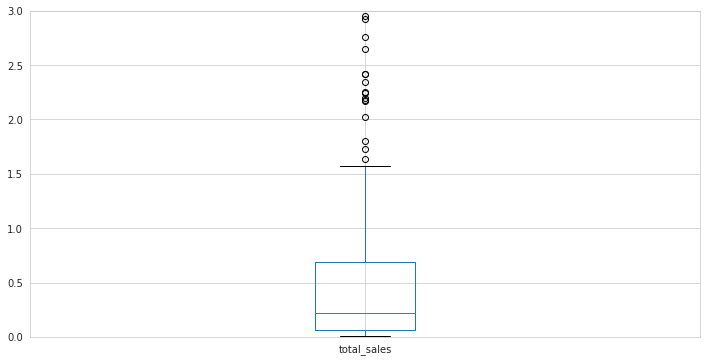

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

ps4 = actual_data.query('platform == "XOne"')
ps4.boxplot(column='total_sales')

ax.set_ylim([0, 3])

In [35]:
actual_data_pivot = actual_data[actual_data['platform'] == 'XOne'].pivot_table(index='year_of_release',
                                                                              values = 'total_sales',
                                                                              aggfunc = 'sum')
actual_data_pivot

,total_sales
year_of_release,
2013,18.96
2014,54.07
2015,60.14
2016,26.15


А вот у XOne продажи хоть и растут, но их явно меньше, чем у PS4, и рост этот идет не так резко.

### Влияние отзывов пользователей и критиков на продажи

#### PS4

In [36]:
# Посмотрим, как влияют отзывы на продажи PS4, предварительно исключив наши заполненные нулями пропуски.
ps4 = actual_data.query('platform == "PS4" and critic_score > 0 and user_score > 0')

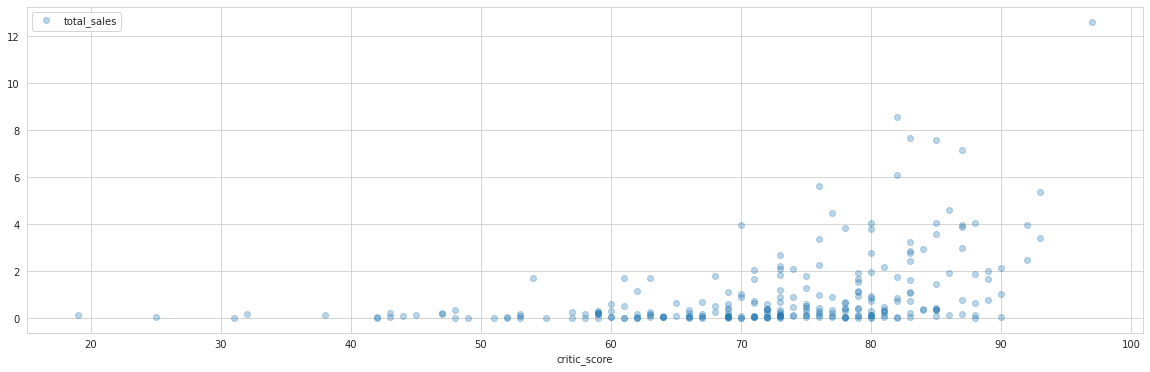

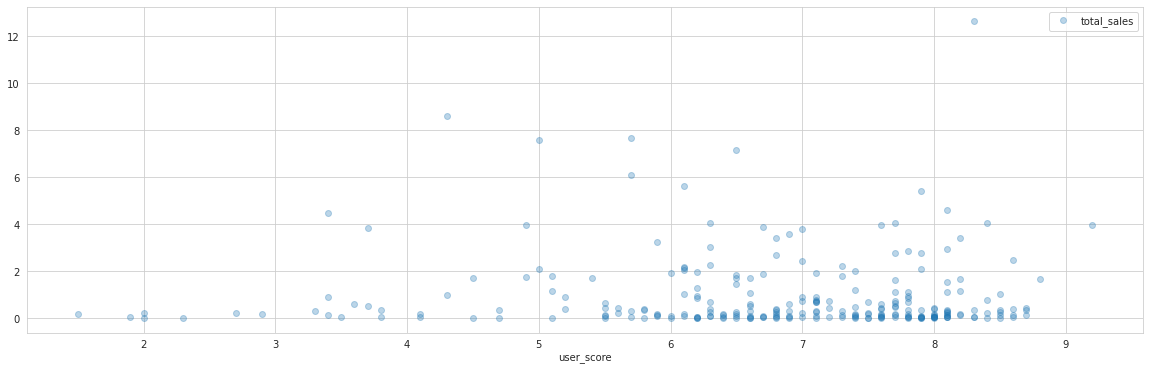

In [37]:
ps4.plot(x= 'critic_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6), alpha = 0.3)
ps4.plot(x= 'user_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6), alpha = 0.3)
None

In [38]:
display(ps4['total_sales'].corr(ps4['critic_score']))
display(ps4['total_sales'].corr(ps4['user_score']))

0.40589480145836687

-0.03362497596528878

Оценки критиков и оценки пользователей имеют разный коэффициент корреляции.
Так критики слабо влияют на продажи, а вот пользователи практически не оказывают на них никакого действия.

#### XOne

Сравним с показателями XOne

In [39]:
XOne = actual_data.query('platform == "XOne" and critic_score > 0 and user_score > 0')

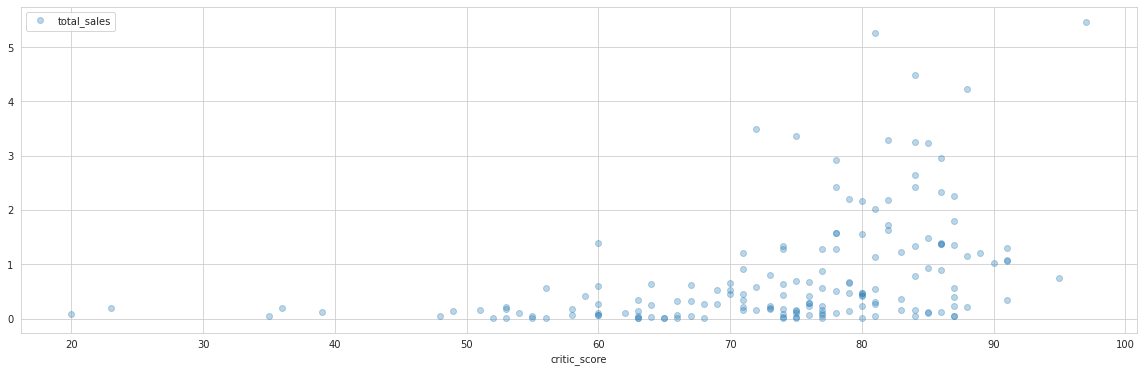

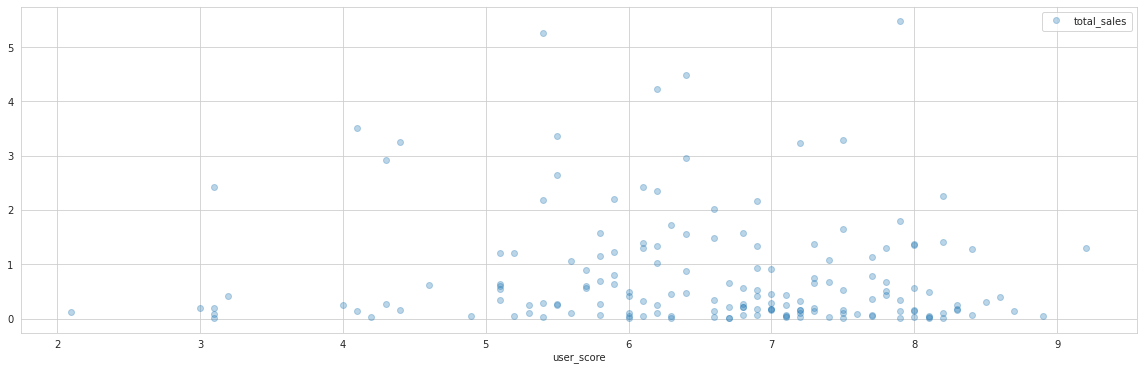

In [40]:
XOne.plot(x= 'critic_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6), alpha = 0.3)
XOne.plot(x= 'user_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6), alpha = 0.3)
None

In [41]:
display(XOne['total_sales'].corr(XOne['critic_score']))
display(XOne['total_sales'].corr(XOne['user_score']))

0.4104220356129637

-0.09400318326920852

Показатели практически полностью идентичны PS4

#### 3DS

In [42]:
n_3ds = actual_data.query('platform == "3DS" and critic_score > 0 and user_score > 0')

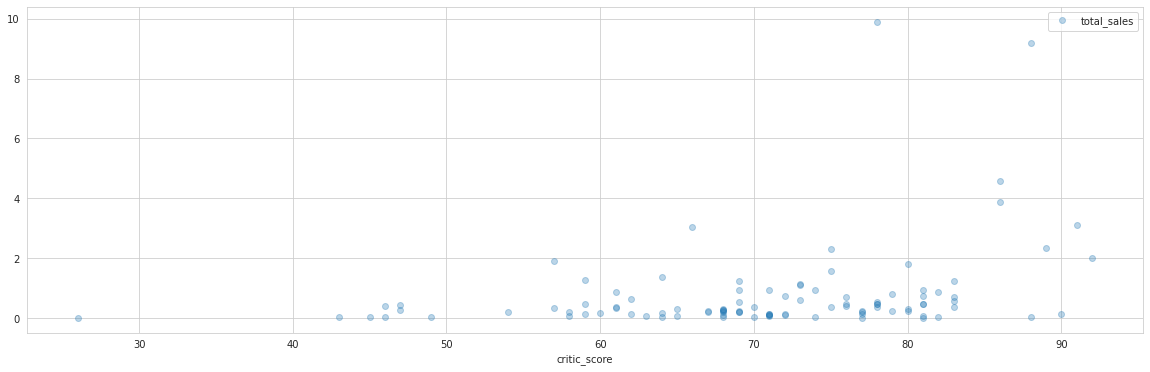

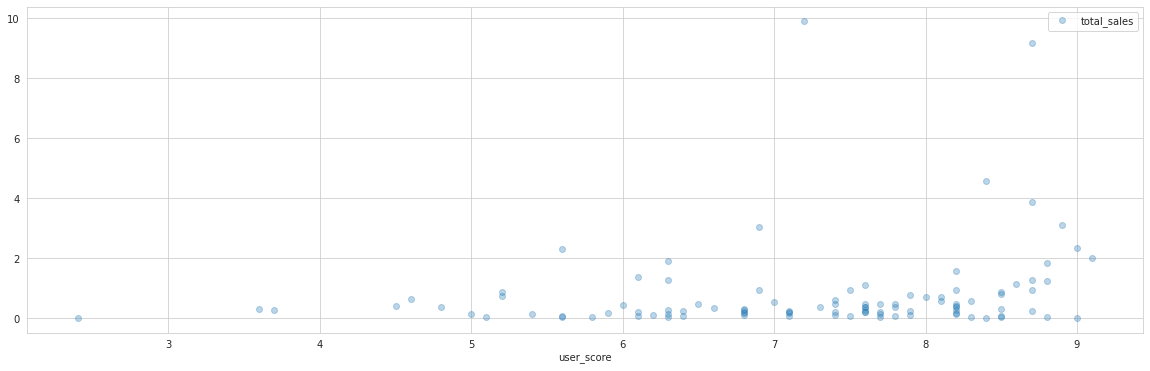

In [43]:
n_3ds.plot(x= 'critic_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6), alpha = 0.3)
n_3ds.plot(x= 'user_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6), alpha = 0.3)
None

In [44]:
display(n_3ds['total_sales'].corr(n_3ds['critic_score']))
display(n_3ds['total_sales'].corr(n_3ds['user_score']))

0.31055301915326294

0.2018125500765528

А вот корреляция по нинтендо немного отличается от предыдущих, хоть и взаимосвязь оценок с продажами остается довольно слабой.

#### Общий вывод о влиянии отзывов

* У PS4 и XOne корреляции схожи, где пользователи никак на продажи не влияют.
* У 3DS пользовательские оценки имеют больше веса, но коэффициент корреляции все равно прослеживается слабо.
* Покупатели на всех платформах больше прислушиваются к оценкам критиков, чем к пользователям.

### Общее распределение игр по жанрам

In [45]:
actual_data.groupby('genre', as_index=False).agg({'total_sales': 'sum'}).sort_values(by ='total_sales', ascending=False)

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


In [46]:
top_genre = actual_data.pivot_table(index='genre',
                       values='total_sales',
                       aggfunc=['sum', 'mean' ,'median'])

top_genre.columns = ['sum', 'mean', 'median']
top_genre.sort_values('median', ascending=False)

,sum,mean,median
genre,,,
Shooter,304.73,1.296723,0.440
Sports,181.07,0.675634,0.240
Platform,61.00,0.717647,0.210
Role-Playing,192.80,0.521081,0.140
Racing,53.50,0.465217,0.140
Fighting,44.49,0.408165,0.130
Action,441.12,0.427856,0.120
Misc,85.04,0.442917,0.120
Simulation,35.12,0.439000,0.120


В топ-5 по продажам входят жанры shooter, sports, platform и role-playing. Самый менее продаваемый жанр пазлов и приключений.
Популярность первых топ-5 жанров обуславливается, я думаю, их динамичностью и вовлеченностью в процесс игры. Эти жанры являются самыми интересными, к тому же по большей части подобные проекты носят online-характер.
Стратегии, к примеру, таким спросом не пользуются. Они спокойные и обычно партии в них длятся по несколько суток, отчего у основной массы людей внимание на них не лежит.
Ну а пазлы вообще довольно специфичный жанр на любитея. На него вряд ли станут тратить много денег. Да и игры подобные не имеют большой стоимости.

## Портрет пользователя каждого региона

### Северная Америка

In [47]:
# Топ-5 популярных платформ в Северной Америке:
na_platform = actual_data.groupby('platform', as_index=False).agg({'na_sales': 'sum'}).sort_values(by ='na_sales', ascending=False).head()
na_platform

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


Самым большим спросом пользуется X360. Думаю, PS4 только начинает набирать популярность.

In [48]:
# Посмотрим топ-5 популярных жанров для данного региона:
na_genre = actual_data.groupby('genre', as_index=False).agg({'na_sales': 'sum'}).sort_values(by ='na_sales', ascending=False).head()
na_genre

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


По жанрам распределение сопадает с топом по миру.

In [49]:
# Влияет ли рейтинг ESRB на продажи:
na_esbr = actual_data.groupby('rating', as_index=False).agg({'na_sales': 'sum'}).sort_values(by ='na_sales', ascending=False).head()
na_esbr

,rating,na_sales
2,M,231.57
0,E,114.37
4,undefined,103.31
1,E10+,75.70
3,T,66.02


В Северной Америке самые высокие рейтинги у жанра «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

Далее идет «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.

И следом за ним игры с неопреденным жанром.

Остальные жанры менее популярные.

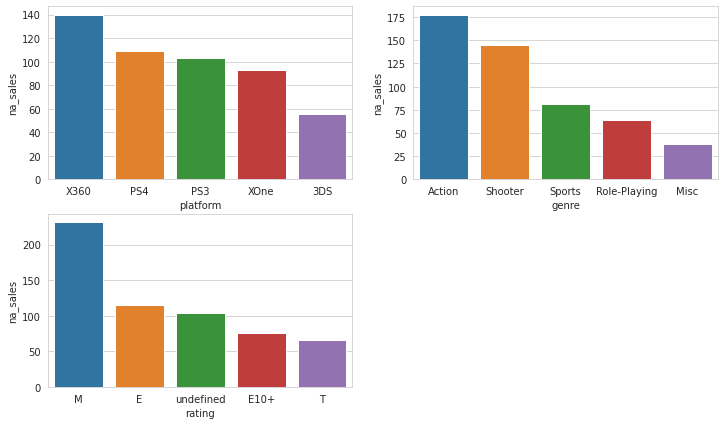

In [50]:
plt.subplots(figsize=(12, 7))
plt.subplot(221)
sns.barplot(data=na_platform, x='platform', y='na_sales')
plt.subplot(222)
sns.barplot(data=na_genre, x='genre', y='na_sales')
plt.subplot(223)
sns.barplot(data=na_esbr, x='rating', y='na_sales')
None

### Европа

In [51]:
# Топ-5 популярных в Европе:
eu_platform = actual_data.groupby('platform', as_index=False).agg({'eu_sales': 'sum'}).sort_values(by ='eu_sales', ascending=False).head()
eu_platform

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


А вот в Европе во всю уже лидирует PS4.

In [52]:
# Топ-5 самых популярных жанров:
eu_genre = actual_data.groupby('genre', as_index=False).agg({'eu_sales': 'sum'}).sort_values(by ='eu_sales', ascending=False).head()
eu_genre

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


Распределение, опять же, аналогично распределению Северной Америке, разве что количество продаж совсем немного меньше.

In [53]:
# Влияет ли рейтинг ESRB на продажи:
eu_esbr = actual_data.groupby('rating', as_index=False).agg({'eu_sales': 'sum'}).sort_values(by ='eu_sales', ascending=False).head()
eu_esbr

,rating,eu_sales
2,M,193.96
0,E,113.03
4,undefined,91.50
1,E10+,55.37
3,T,52.96


Аналогичное распределение по рейтингу ESRB и в Европе, разве что количество продаж по прежнему чуть меньше.

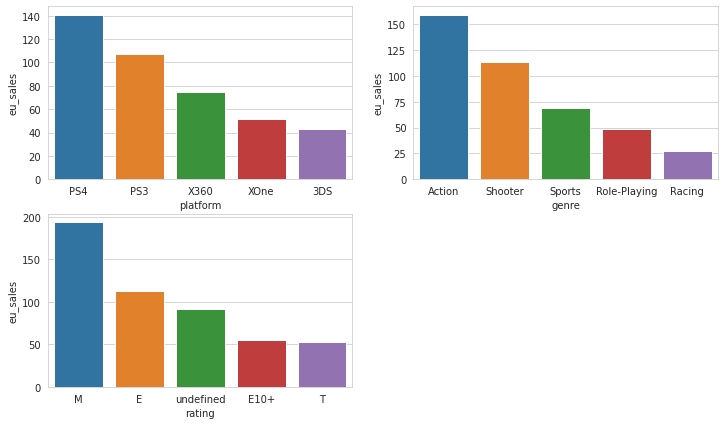

In [54]:
plt.subplots(figsize=(12, 7))
plt.subplot(221)
sns.barplot(data=eu_platform, x='platform', y='eu_sales')
plt.subplot(222)
sns.barplot(data=eu_genre, x='genre', y='eu_sales')
plt.subplot(223)
sns.barplot(data=eu_esbr, x='rating', y='eu_sales')
None

### Япония

In [55]:
# Топ-5 популярных в Японии:
jp_platform = actual_data.groupby('platform', as_index=False).agg({'jp_sales': 'sum'}).sort_values(by ='jp_sales', ascending=False).head()
jp_platform

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


А вот с Японием дела обстоят иначе. У них популярна в основном 3DS.

In [56]:
# Топ-5 самых популярных жанров:
jp_genre = actual_data.groupby('genre', as_index=False).agg({'jp_sales': 'sum'}).sort_values(by ='jp_sales', ascending=False).head()
jp_genre

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


И жанры там распределены по-другому. Лидирующее место занимают игры в жанре role-Playing, после него идут action и misc.

In [57]:
# Влияет ли рейтинг ESRB на продажи:
jp_esbr = actual_data.groupby('rating', as_index=False).agg({'jp_sales': 'sum'}).sort_values(by ='jp_sales', ascending=False).head()
jp_esbr

,rating,jp_sales
4,undefined,108.84
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


Лидирующее место занимают игры с неопределенным рейтингом, за ними следуют игры с рейтингом "для всех", а вот "М", лидирующий в Америке и Европе стоит чуть ли не на последнем месте.

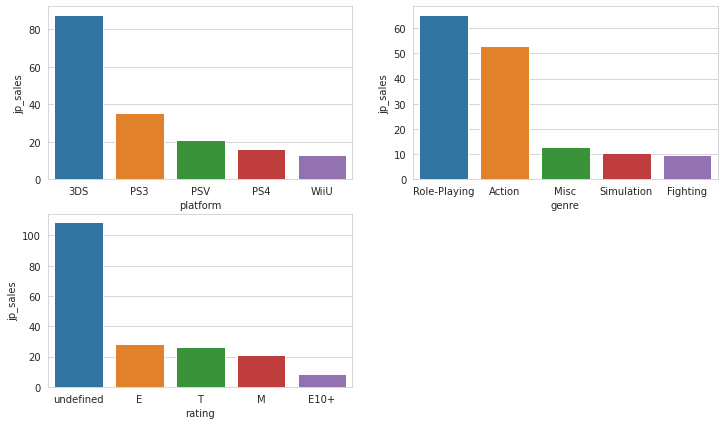

In [58]:
plt.subplots(figsize=(12, 7))
plt.subplot(221)
sns.barplot(data=jp_platform, x='platform', y='jp_sales')
plt.subplot(222)
sns.barplot(data=jp_genre, x='genre', y='jp_sales')
plt.subplot(223)
sns.barplot(data=jp_esbr, x='rating', y='jp_sales')
None

### Портрет пользователя

На основе полученных данных, можно выявить следующие закономерности:

Рейтинг по платформам:
* в Северной Америке - Xbox One
* в Европе - PS4
* в Японии - 3DS

Рейтинг по жанрам:
* в Северной Америке - Action
* в Европе - Action
* в Японии - Role-Playing

Рейтинг от организации ESRB:
* в Северной Америке - M
* в Европе - M
* в Японии - рейтинг неопределён, E

## Проверка гипотез

Нам предстоит проверить следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: средние пользовательские рейтинги по платформам одинаковые

H1: средние пользовательские рейтинги по платформам разные

In [59]:
# Создаем две новые переменные с выборками под нужные нам платформы:
xone = data[(data['platform']=='XOne') & (data['year_of_release']>2012)]['user_score']
pc = data[(data['platform']=='PC') & (data['year_of_release']>2012)]['user_score']

alpha = .01 # Критический уровень статистической значимости

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.24400999542744453
Не получилось отвергнуть нулевую гипотезу


Значение p-value примерно равно `2%`, благодаря чему мы не можем отвергнуть нулевую гипотезу.

То есть, с вероятностью в `2%` можно получить различность рейтингов двух платформ

### Средние пользовательские рейтинги жанров Action и Sports разные

In [60]:
# Создаем две новые переменные с выборками под нужные нам жанры:
action = data[(data['genre']=='Action') & (data['year_of_release']>2012)]['user_score']
sports = data[(data['genre']=='Sports') & (data['year_of_release']>2012)]['user_score']

alpha = .01 # Критический уровень статистической значимости

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.051807560603891564
Не получилось отвергнуть нулевую гипотезу


In [61]:

    
# Создаем две новые переменные с выборками под нужные нам жанры:
action =  actual_data[( actual_data['genre']=='Action')]['user_score']
sports =  actual_data[( actual_data['genre']=='Sports')]['user_score']

alpha = .01 # Критический уровень статистической значимости

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.014166975726904863
Не получилось отвергнуть нулевую гипотезу


На основании pvalue вероятность получить одинакове средние рейнтинги по двум жанрам равняется `5%`
Отвергнуть нулевую гипотезу не получилось

## Общий вывод

Мы выполнили предобработку данных и выявили определяющие успешность игры закономерности, что должно позволить сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

На основании выполненного проекта было выяснено:

Выпуск игр по годам:
* Всего было выпущено `16715` игр
* Наибольшее кол-во игр было выпущено в 2008-2009 гг.
* Начиная с 2012 был спад

Продажи по платформам:
* Больше всего продаж было на PS2, X360, PS3, Wii и DS, среди которых PS2 лидирует
* Среднее время жизни платформы - `10 лет`

К началу `2016` года наиболее прибыльными себя показывают PS4, PS3, X360, 3DS, XOne.

Оценки критиков слабо влияют на продажи, а пользовательские оценки практически никак на них не сказываются.

Топ самых популярных жанров:
* Shooter
* Sports
* Platform
* Role-playing

Портрет пользователя из Северной Америки:
* Имеет `Xbox`
* Любит играть в `Action` игры
* В основном предпочитает игры с ESRB рейтингом `"M"`

Портрет пользователя из Европы:
* Имеет `PS4`
* Любит играть в `Action` игры
* В основном предпочитает игры с ESRB рейтингом `"M"`

Портрет пользователя из Японии:
* Имеет `3DS`
* Любит играть в игры с жанром `"Role-playing"`
* Предпочитает игры с неопределенным рейтингом, либо рейтингом `"Е"`

Исходя из всех полученных данных предположим, что лучше всего продавать игры для приставок PS4 и XOne с жанром "shooter", либо "action" и возрастным ограничением 17+

Тогда можно ожидать значительно больших продаж.